In [639]:
#Importing all important libraries that are required

import nltk
nltk.downloader 
nltk.download('punkt')
nltk.download('stopwords')

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()

import re
import string

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

<module 'nltk.downloader' from 'C:\\Users\\mdharw2\\Anaconda3\\lib\\site-packages\\nltk\\downloader.py'>

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdharw2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdharw2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [640]:
df = pd.read_csv("data/Tweets_Data.csv")
df = df.drop(columns = 'Unnamed: 0')

In [641]:
print(df.shape)
df.head()

(8337, 2)


,text,class
0,Drasko they didn't cook half a bird you idiot ...,1
1,Hopefully someone cooks Drasko in the next ep ...,1
2,of course you were born in serbia...you're as ...,1
3,These girls are the equivalent of the irritati...,1
4,RT @YesYoureRacist: At least you're only a tin...,1


In [642]:
# class 0 - not hate 
# class 1 - hate

In [643]:
# Create class description for each row in data
df['class_descr'] = df['class'].map(lambda x: 'hate_speech' if x==1 else 'not_hate_speech')

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         8335 non-null   object
 1   class        8337 non-null   int64 
 2   class_descr  8337 non-null   object
dtypes: int64(1), object(2)
memory usage: 195.5+ KB


In [645]:
df.head()

,text,class,class_descr
0,Drasko they didn't cook half a bird you idiot ...,1,hate_speech
1,Hopefully someone cooks Drasko in the next ep ...,1,hate_speech
2,of course you were born in serbia...you're as ...,1,hate_speech
3,These girls are the equivalent of the irritati...,1,hate_speech
4,RT @YesYoureRacist: At least you're only a tin...,1,hate_speech


In [646]:
# Drop NaN values in text column

df.dropna(subset=['text'], inplace=True)

C:\Users\mdharw2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Number of Tweets / class')

Text(0.5, 0, 'Type')

Text(0, 0.5, 'Number of Tweets')

[Text(0, 0, 'Not Hate'), Text(1, 0, 'Hate')]

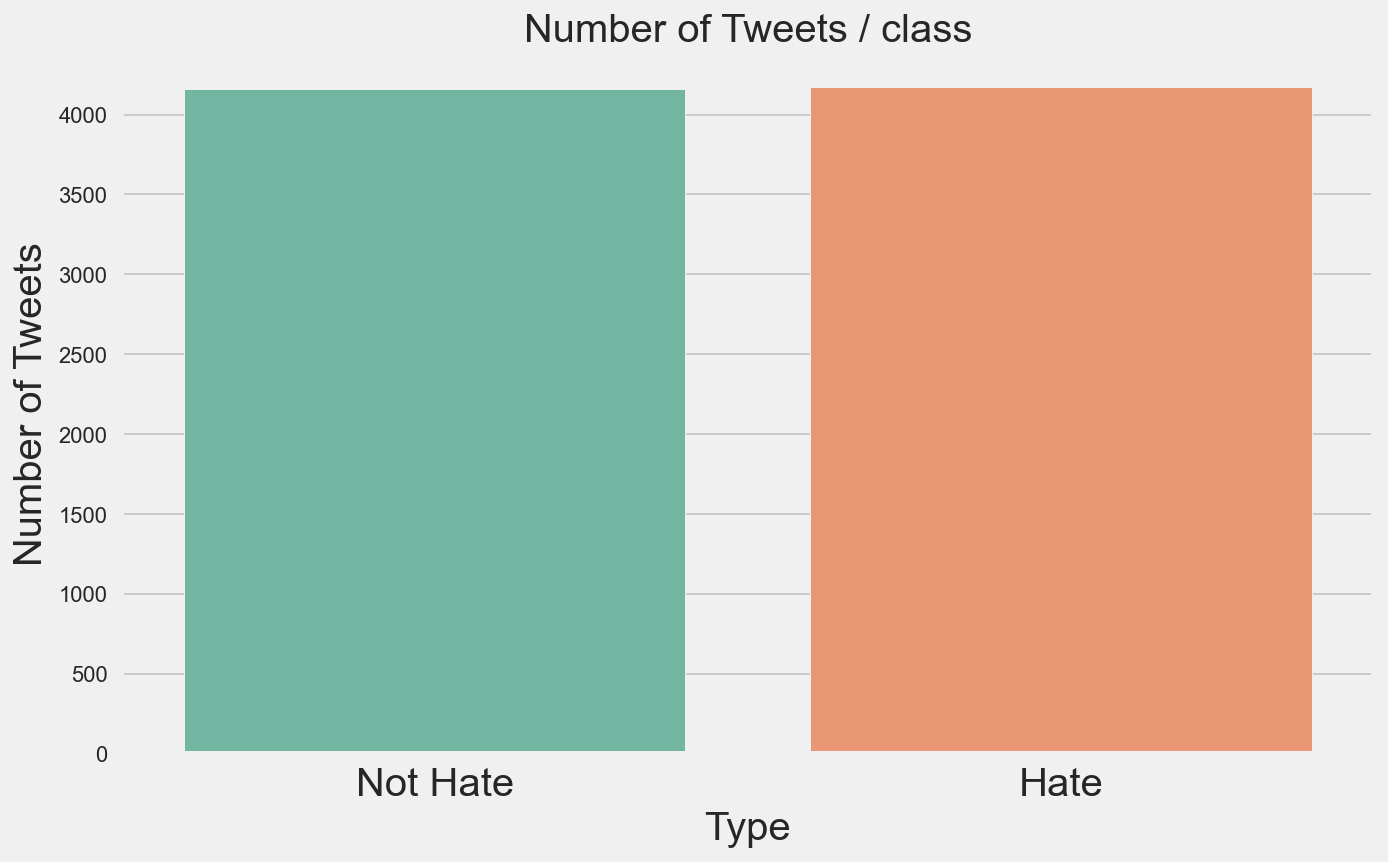

In [647]:

fig, axis = plt.subplots(figsize=(10,6))
axis = sns.countplot(df['class'], palette='Set2')

axis.set_title('Number of Tweets / class',fontsize = 20)
axis.set_xlabel('Type',fontsize = 20)
axis.set_ylabel('Number of Tweets',fontsize = 20)
axis.set_xticklabels(['Not Hate','Hate'],fontsize = 20)


## Data Preprocessing

In [648]:
#Clean the text in the data
preprocess_tweet(df, 'text')
df


,text,class,class_descr
0,drasko they didnt cook half a bird you idiot mkr,1,hate_speech
1,hopefully someone cooks drasko in the next ep ...,1,hate_speech
2,of course you were born in serbiayoure as fuck...,1,hate_speech
3,these girls are the equivalent of the irritati...,1,hate_speech
4,at least youre only a tiny bit racist im not r...,1,hate_speech
...,...,...,...
8332,you know what they say the early bird gets the...,0,not_hate_speech
8333,youre all niggers,1,hate_speech
8334,youre such a retard i hope you get type diabet...,1,hate_speech
8335,youve gone and broke the wrong heart baby and ...,0,not_hate_speech


In [649]:
# Function to filter data with words that contain more then 2 characters
def filter_tweet(row, n =2):
    new_list = []
    for word in row['text'].split(' '):
        if len(word) > 3:
            new_list.append(word)
    row['text'] = ' '.join(new_list)
    return row

In [650]:
df = df.apply(filter_tweet, axis = 1)

In [651]:
df

,text,class,class_descr
0,drasko they didnt cook half bird idiot,1,hate_speech
1,hopefully someone cooks drasko next,1,hate_speech
2,course were born serbiayoure fucked serbian film,1,hate_speech
3,these girls equivalent irritating asian girls ...,1,hate_speech
4,least youre only tiny racist racist dick,1,hate_speech
...,...,...,...
8332,know what they early bird gets worm puts gummy...,0,not_hate_speech
8333,youre niggers,1,hate_speech
8334,youre such retard hope type diabetes from suga...,1,hate_speech
8335,youve gone broke wrong heart baby drove rednec...,0,not_hate_speech


In [652]:
#Removing Stopwords
remove_stopwords = stopwords.words('english')

In [653]:
#Creating a function to tokenise the data

def text_tokenisation(T):
    
    Stamp = nltk.word_tokenize(T)
    
    stopwords_removed = [token for token in Stamp if token not in remove_stopwords] 
    
    return stopwords_removed

In [654]:
df['text']

0                  drasko they didnt cook half bird idiot
1                     hopefully someone cooks drasko next
2        course were born serbiayoure fucked serbian film
3       these girls equivalent irritating asian girls ...
4                least youre only tiny racist racist dick
                              ...                        
8332    know what they early bird gets worm puts gummy...
8333                                        youre niggers
8334    youre such retard hope type diabetes from suga...
8335    youve gone broke wrong heart baby drove rednec...
8336    ruffled ntac eileen dahlia beautiful color com...
Name: text, Length: 8335, dtype: object

In [655]:
final_data = list(map(text_tokenisation, df['text']))

In [656]:
# Writing function to plot word frequency 

def word_freq(T):
    new_list = []
    for twt in T:
        for words in twt:
            new_list.append(words)

    word_dist = FreqDist(new_list)
    plt.figure(figsize=(15,7))
    word_dist.plot(25, title = "Word Frequency")
    plt.show()

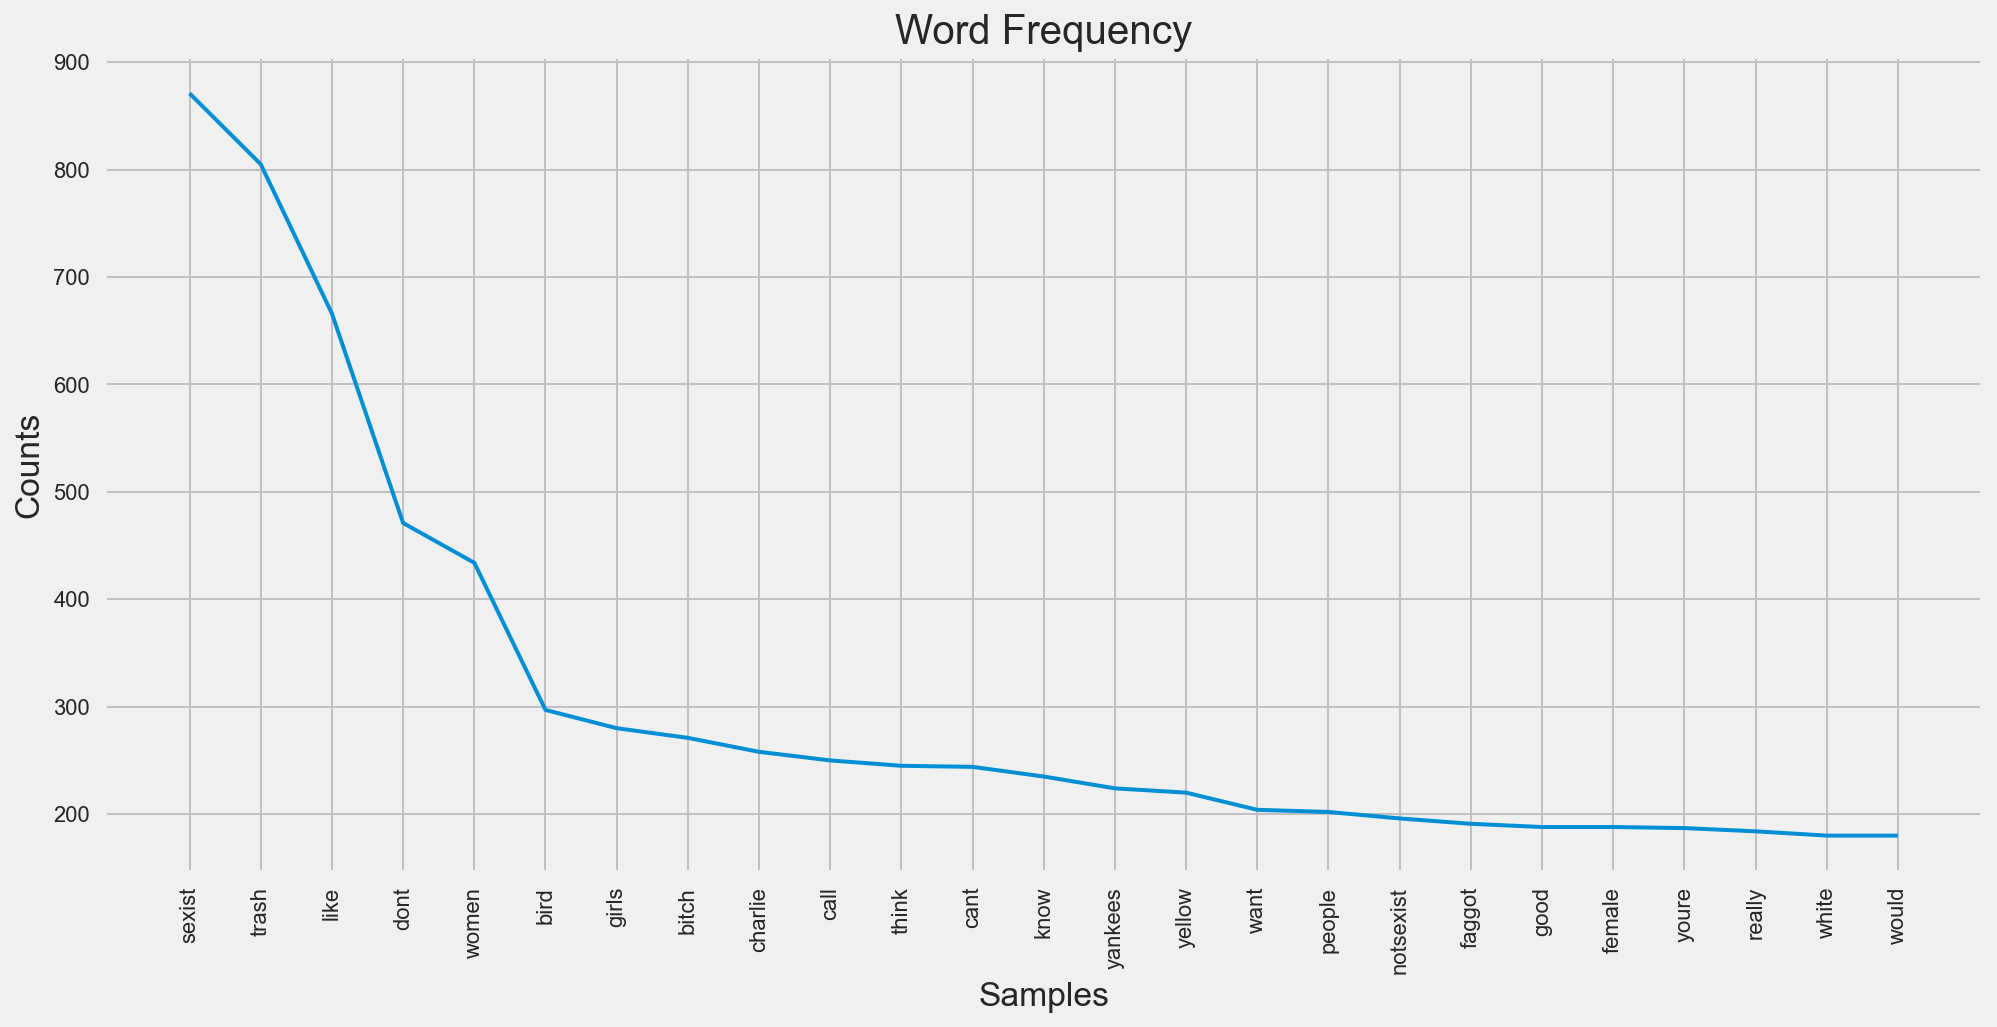

In [657]:
word_freq(final_data)

In [658]:
set_of_vocab = set()
for tweet in final_data:
    set_of_vocab.update(tweet)
len(set_of_vocab)

12682

In [659]:
df

,text,class,class_descr
0,drasko they didnt cook half bird idiot,1,hate_speech
1,hopefully someone cooks drasko next,1,hate_speech
2,course were born serbiayoure fucked serbian film,1,hate_speech
3,these girls equivalent irritating asian girls ...,1,hate_speech
4,least youre only tiny racist racist dick,1,hate_speech
...,...,...,...
8332,know what they early bird gets worm puts gummy...,0,not_hate_speech
8333,youre niggers,1,hate_speech
8334,youre such retard hope type diabetes from suga...,1,hate_speech
8335,youve gone broke wrong heart baby drove rednec...,0,not_hate_speech


In [660]:
#Vectorisation

vectoriser = CountVectorizer(stop_words = 'english')
df_vectoriser = vectoriser.fit_transform(df.text)
data_dtm = pd.DataFrame(df_vectoriser.toarray(), columns= vectoriser.get_feature_names())
data_dtm.index = df.index
data_dtm.head()

,aaaaaaaaand,aaand,aaron,aaronmacgruder,abandonado,abandonment,abbey,abby,abdelka,abduction,...,zone,zones,zookeeper,zoomed,zooming,zorro,zucchini,zzzquil,zzzz,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Most Frequent Words for Each Class# 

In [661]:
df_hate = df[df['class']==1]
df_not_hate = df[df['class']==0]

hate = df_hate['text']
not_hate = df_not_hate['text']

def top_20_words(data, n = 20, show= True):
    
    mapped_words = list(map(tokenize_text, data))
    
    all_words = set()
    for comment in mapped_words:
        all_words.update(comment)
    
    if show:
        print('Top 20 words with frequency')
        list_freq = [item for sublist in mapped_words for item in sublist]
        freq = FreqDist(list_freq)
        return freq.most_common(n)
    list_freq = [item for sublist in mapped_words for item in sublist]
    freq = FreqDist(list_freq)
    return freq

top_20_words(data_hate, show=True)

Top 20 words with frequency


[('sexist', 871),
 ('women', 420),
 ('like', 365),
 ('dont', 302),
 ('bitch', 260),
 ('girls', 244),
 ('call', 210),
 ('notsexist', 196),
 ('faggot', 191),
 ('think', 178),
 ('female', 176),
 ('fuck', 172),
 ('cant', 170),
 ('know', 146),
 ('nigga', 140),
 ('woman', 138),
 ('white', 133),
 ('fucking', 132),
 ('hate', 128),
 ('youre', 124)]

In [662]:
def normalisation(data, n=20):
    
    freq = freq_wrds_class(data, n, show = False)
    count = sum(freq.values())
    top = freq.most_common(20)
    print("Word \t\t\t Normalized Frequency")
    print()
    for word in top:
        normalized_frequency = word[1]/count
        print("{} \t\t\t {:.3}".format(word[0], normalized_frequency))

In [663]:
normalisation(hate)

Word 			 Normalized Frequency

sexist 			 0.0308
women 			 0.0148
like 			 0.0129
dont 			 0.0107
bitch 			 0.00919
girls 			 0.00862
call 			 0.00742
notsexist 			 0.00693
faggot 			 0.00675
think 			 0.00629
female 			 0.00622
fuck 			 0.00608
cant 			 0.00601
know 			 0.00516
nigga 			 0.00495
woman 			 0.00488
white 			 0.0047
fucking 			 0.00466
hate 			 0.00452
youre 			 0.00438


In [664]:
normalisation(not_hate)

Word 			 Normalized Frequency

trash 			 0.0241
like 			 0.0105
bird 			 0.0103
charlie 			 0.00903
yankees 			 0.00777
yellow 			 0.00753
dont 			 0.00592
birds 			 0.00585
monkey 			 0.00389
ghetto 			 0.00389
colored 			 0.00378
good 			 0.00329
know 			 0.00312
love 			 0.00301
game 			 0.00291
want 			 0.00291
make 			 0.00287
would 			 0.00284
people 			 0.00284
thats 			 0.00273


# Visualization

In [665]:
# Seperate frequency of each class

hate_frequency = freq_wrds_class(hate, show =False)
not_hate_frequency = freq_wrds_class(not_hate, show =False)

In [666]:
# create counts of hate and not hate with values and words

h_bar_counts = [i[1] for i in hate_frequency.most_common(20)]
h_bar_words = [i[0] for i in hate_frequency.most_common(20)]

nh_bar_counts = [i[1] for i in not_hate_frequency.most_common(20)]
nh_bar_words = [i[0] for i in not_hate_frequency.most_common(20)]

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.05, 'Top 20 Most Frequent Words per Label')

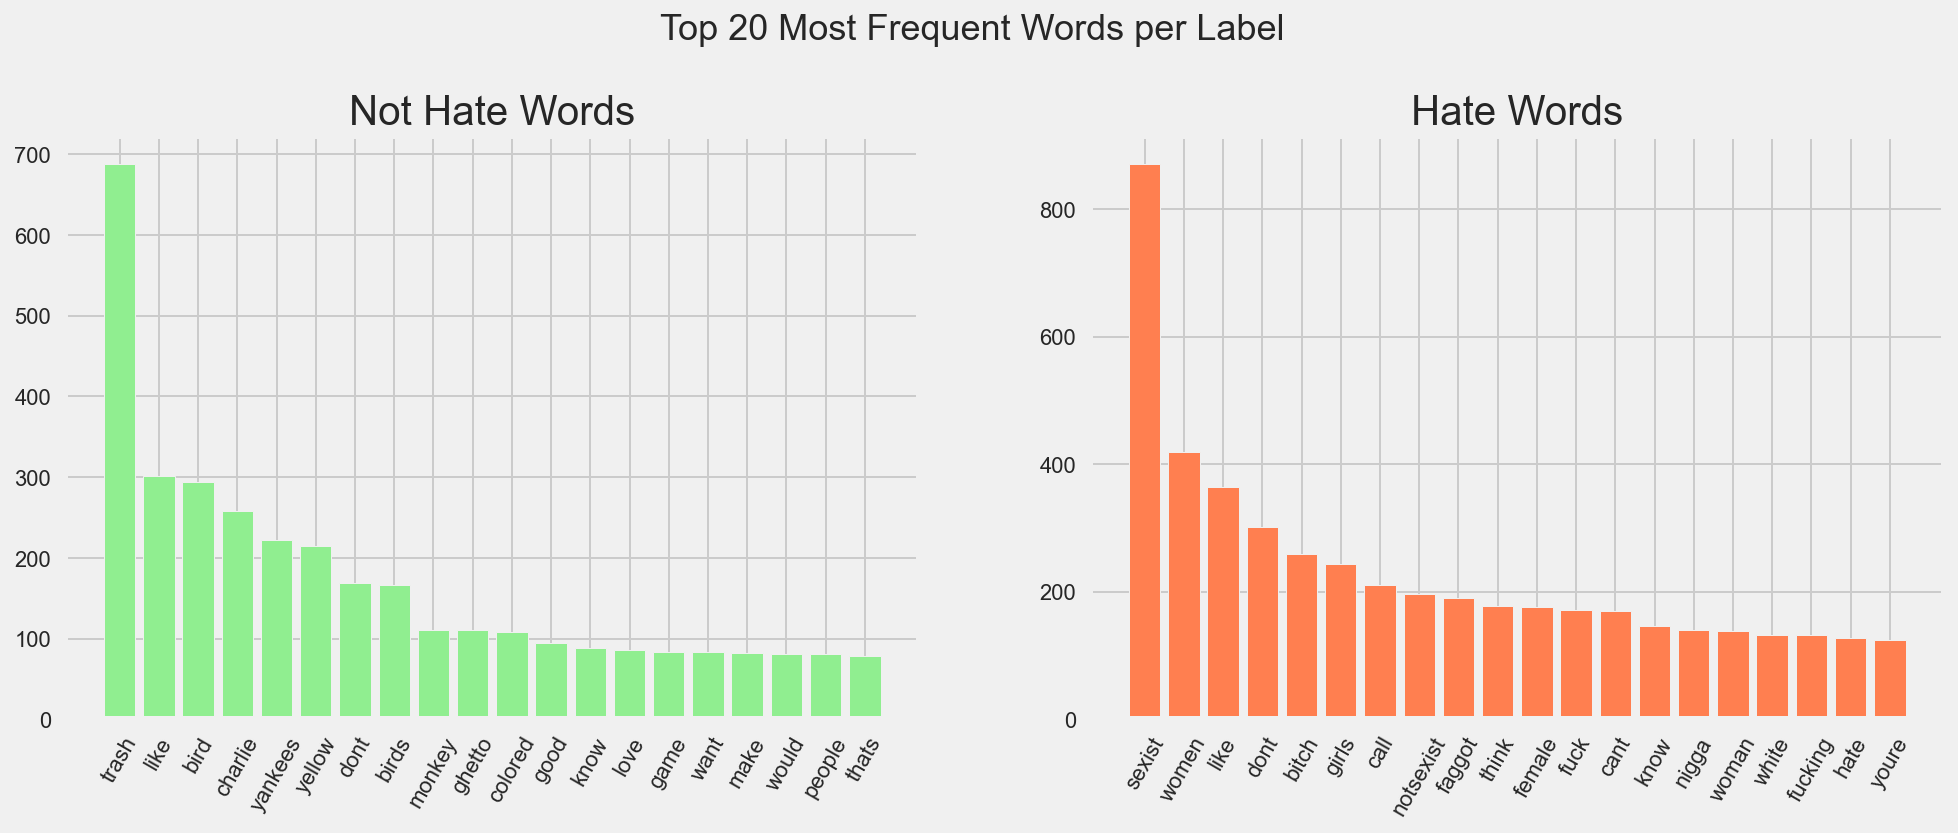

In [667]:
bar_chart = plt.figure(figsize=(15,5))

chart1 = bar_chart.add_subplot(121)
chart2 = bar_chart.add_subplot(122)


chart1.bar(nh_bar_words, nh_bar_counts, color='lightgreen')
chart2.bar(h_bar_words, h_bar_counts, color='coral')

chart1.title.set_text('Not Hate Words')
chart2.title.set_text('Hate Words')

plt.sca(chart2)
plt.xticks(rotation=60)

plt.sca(chart1)
plt.xticks(rotation=60)

bar_chart.suptitle('Top 20 Most Frequent Words per Label', fontsize =18, y =1.05)

plt.show()

Create Word Clouds

In [668]:
hate_dict = dict(zip(h_bar_words, h_bar_counts))
not_hate_dict = dict(zip(nh_bar_words, nh_bar_counts))

In [669]:
def wordcloud(dic, save = False, name = None):
    
    
    wordcloud = WordCloud(colormap='inferno', background_color='ivory').generate_from_frequencies(dic)

    plt.figure(figsize=(10,5), facecolor='r')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Hate Speech Word Cloud', color = "w")
    if save :
        plt.show()
    return

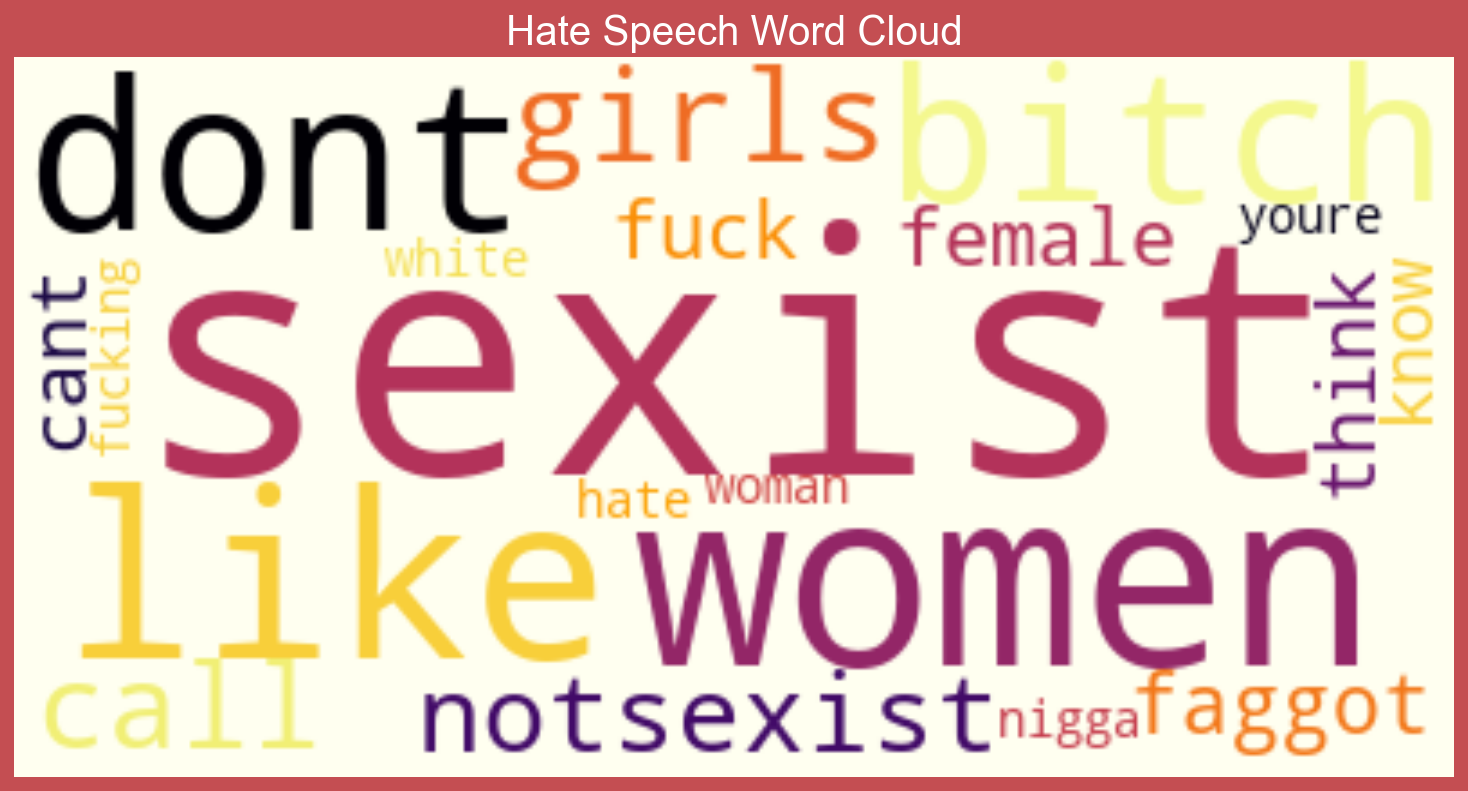

In [670]:
wordcloud(hate_dict, save = True, name = 'hate_speech')

In [671]:
def wordcloud2(dic, save = False, name = None):
    
    
    wordcloud = WordCloud(colormap='inferno', background_color='ivory').generate_from_frequencies(dic)

    plt.figure(figsize=(10,5), facecolor='g')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('Not Hate Speech Word Cloud', color = "w")
    if save :
        plt.show()
    return

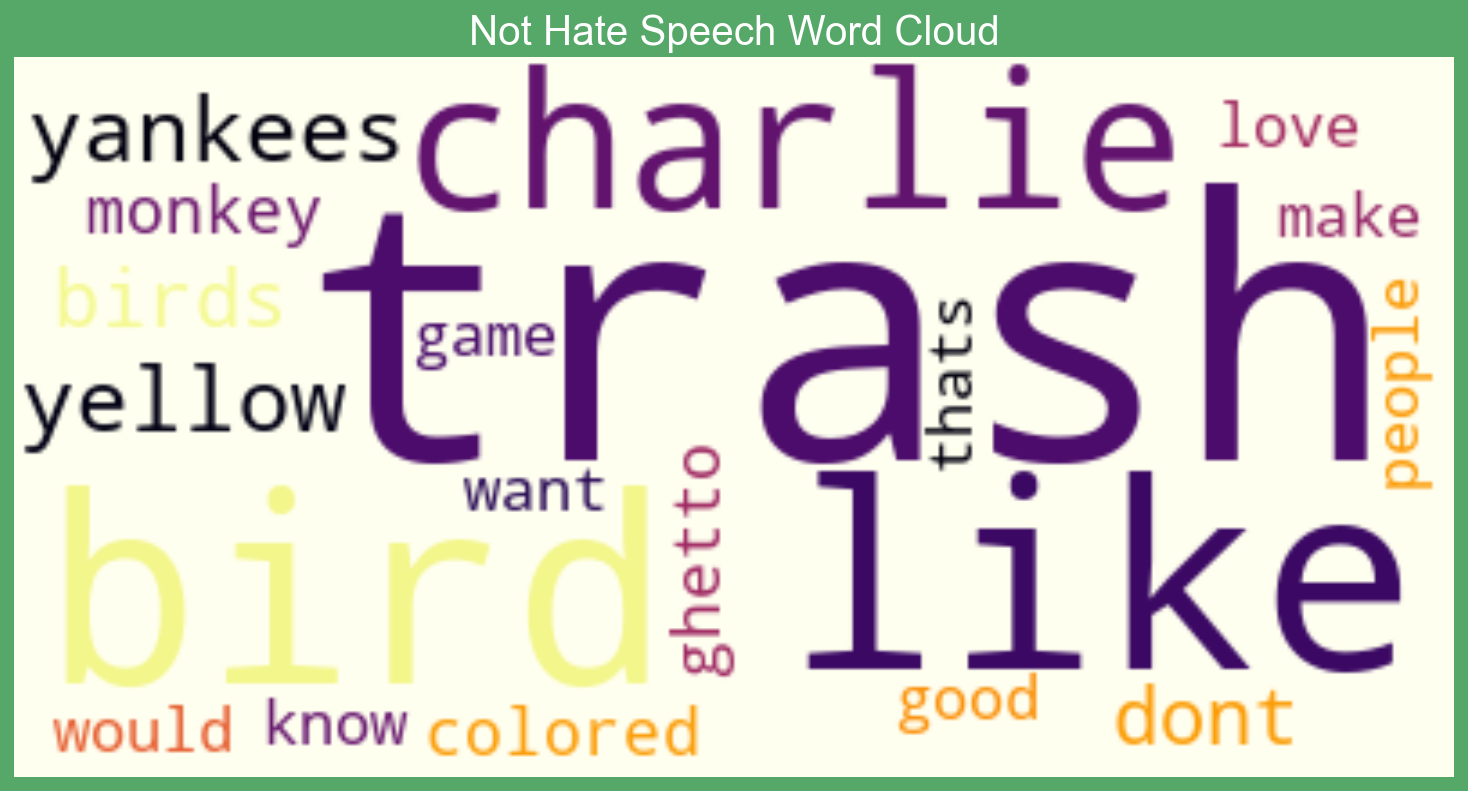

In [672]:
wordcloud2(not_hate_dict, save = True, name = 'not_hate_speech')

# Lematising Data

In [673]:
#Creating function to perform lematisation

def lematisation(T):
    
    L = WordNetLemmatizer() 
    L_output = []

    for tweet in T:
        lemma = ' '.join([L.lemmatize(w) for w in tweet])
        L_output.append(lemma)
        
    return L_output

In [674]:
L_data = lematisation(final_data)

In [675]:
L_data[:7]

['drasko didnt cook half bird idiot',
 'hopefully someone cook drasko next',
 'course born serbiayoure fucked serbian film',
 'girl equivalent irritating asian girl couple year well done',
 'least youre tiny racist racist dick',
 'santa white',
 'eric holder ferguson understand mistrust attorney general also black']

# Create Baseline Models

In [676]:
X = L_data
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer()  # can add unigram , add stop words possible

train_tfidf = tfidf.fit_transform(X_train)  # make sure in train
test_tfidf = tfidf.transform(X_test)   # make sure on test

train_tfidf


<6668x10169 sparse matrix of type '<class 'numpy.float64'>'
	with 44320 stored elements in Compressed Sparse Row format>

In [677]:
# Create an empty dictionary for All models Results 
All_models_dict = {}

## Random Forest Baseline

RandomForestClassifier(n_estimators=99, random_state=0)

Random Forest Model
Precision: 0.8312
Recall: 0.9309
Testing Accuracy: 0.8722
F1 Score: 0.8782


<AxesSubplot:>

Text(0.5, 9.23999999999998, 'True Label')

Text(26.51999999999999, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

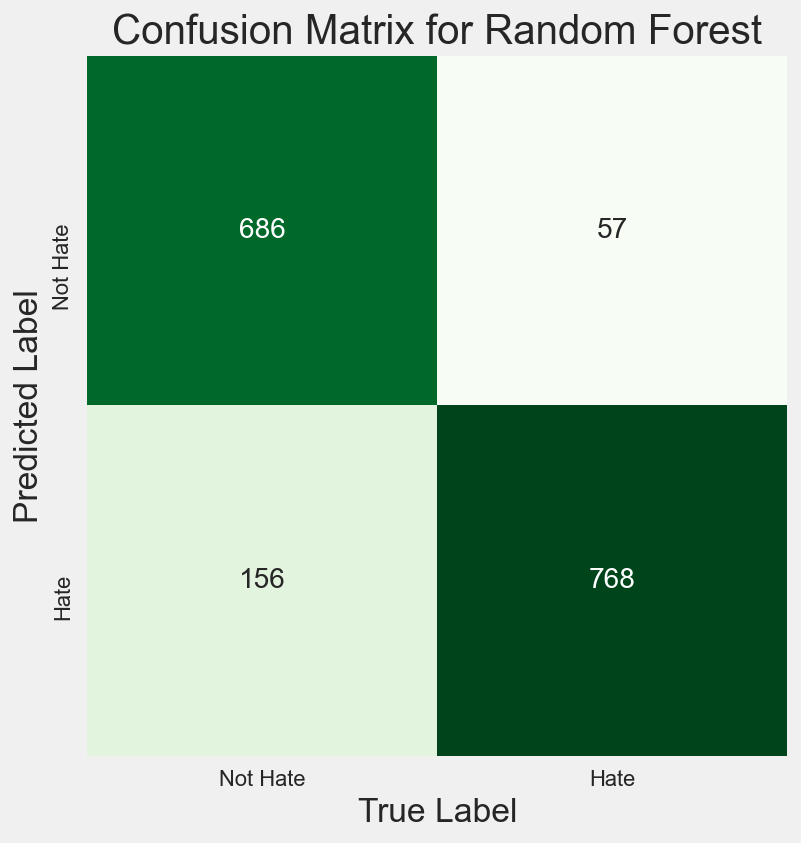

In [678]:
random_forest = RandomForestClassifier(n_estimators=99, random_state=0)
random_forest.fit(train_tfidf, y_train)
random_predict = random_forest.predict(test_tfidf)

random_precision = precision_score(y_test, random_predict)
random_recall = recall_score(y_test, random_predict)
random_accuracy = accuracy_score(y_test, random_predict)
random_f1 = f1_score(y_test, random_predict)
print('Random Forest Model')

print('Precision: {:.4}'.format(random_precision))
print('Recall: {:.4}'.format(random_recall))

print("Testing Accuracy: {:.4}".format(random_accuracy))
print("F1 Score: {:.4}".format(random_f1))

fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, random_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'],cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

All_models_dict['Random Forest'] = {'Precision' : '{:.4}'.format(random_precision), 'Recall': '{:.4}'.format(random_recall), 'F1-score': '{:.4}'.format(random_f1) }

# Logistic Regression Baseline

LogisticRegression(random_state=32)

Logistic Regression
Precision: 0.9135
Recall: 0.8703
Testing Accuracy: 0.895
F1 Score: 0.8914


<AxesSubplot:>

Text(0.5, 9.23999999999998, 'True Label')

Text(26.51999999999999, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

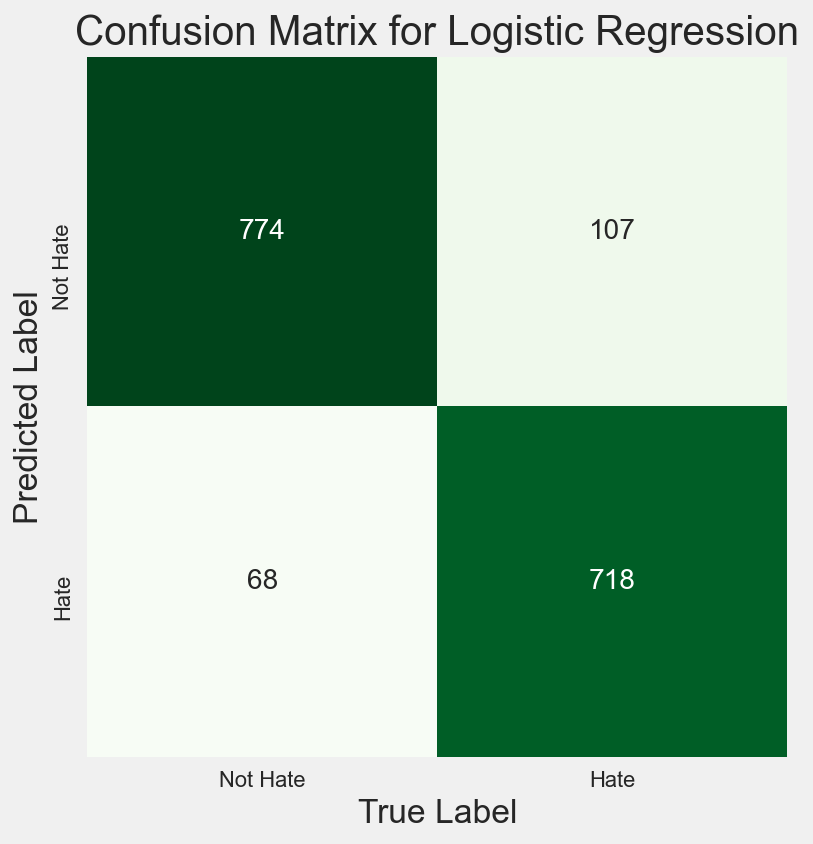

In [679]:
logistic_reg = LogisticRegression(random_state = 32)
logistic_reg.fit(train_tfidf, y_train)
lr_prediction = logistic_reg.predict(test_tfidf)

lr_precision = precision_score(y_test, lr_prediction)
lr_recall = recall_score(y_test, lr_prediction)
lr_accuracy = accuracy_score(y_test, lr_prediction)
lr_f1 = f1_score(y_test, lr_prediction)
print('Logistic Regression')

print('Precision: {:.4}'.format(lr_precision))
print('Recall: {:.4}'.format(lr_recall))

print("Testing Accuracy: {:.4}".format(lr_accuracy))
print("F1 Score: {:.4}".format(lr_f1))

fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, lr_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'], cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.title('Confusion Matrix for Logistic Regression')

All_models_dict['Logistic Regression'] = {'Precision' : '{:.4}'.format(lr_precision), 'Recall': '{:.4}'.format(lr_recall), 'F1-score': '{:.4}'.format(lr_f1) }

# Naive Bayes Baseline

MultinomialNB()

Naive Bayes
Precision: 0.854
Recall: 0.9079
Testing Accuracy: 0.8776
F1 Score: 0.8801


<AxesSubplot:>

Text(0.5, 9.23999999999998, 'True Label')

Text(26.51999999999999, 0.5, 'Predicted Label')

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

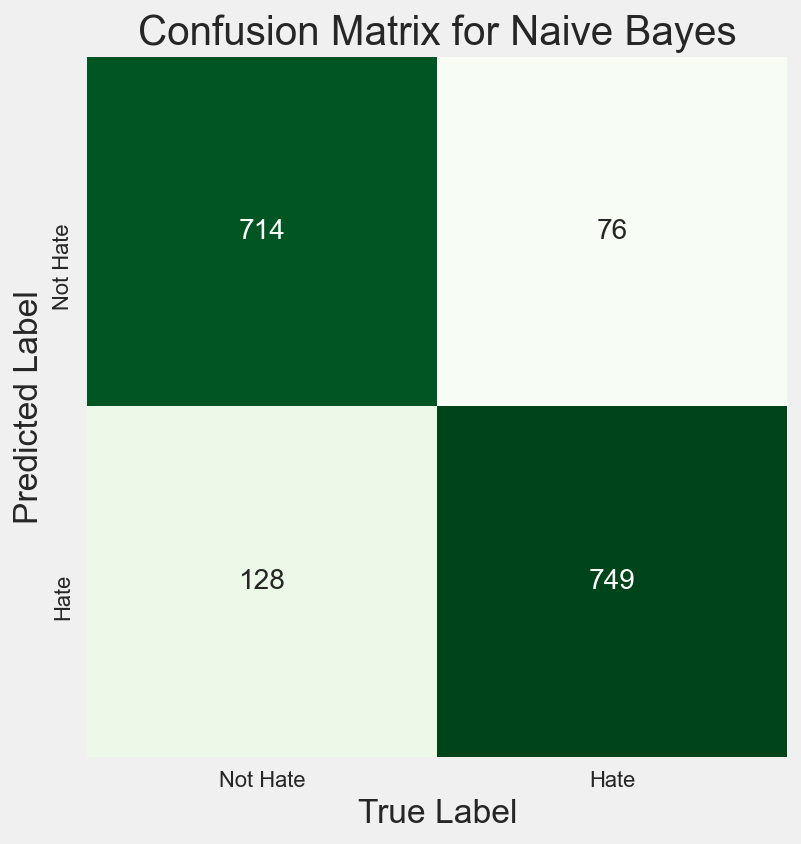

In [680]:
naive = MultinomialNB()
naive.fit(train_tfidf, y_train)
naive_prediction = naive.predict(test_tfidf)

naive_precision = precision_score(y_test, naive_prediction)
naive_recall = recall_score(y_test, naive_prediction)
naive_accuracy = accuracy_score(y_test, naive_prediction)
naive_f1 = f1_score(y_test, naive_prediction)
print('Naive Bayes')

print('Precision: {:.4}'.format(naive_precision))
print('Recall: {:.4}'.format(naive_recall))

print("Testing Accuracy: {:.4}".format(naive_accuracy))
print("F1 Score: {:.4}".format(naive_f1))

fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_test, naive_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'],cmap='Greens')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix for Naive Bayes');

All_models_dict['Naive Bayes'] = {'Precision' : '{:.4}'.format(naive_precision), 'Recall': '{:.4}'.format(naive_recall), 'F1-score': '{:.4}'.format(naive_f1) }



In [681]:
All_model_results = pd.DataFrame(All_models_dict).T

In [682]:
All_model_results

,Precision,Recall,F1-score
Random Forest,0.8312,0.9309,0.8782
Logistic Regression,0.9135,0.8703,0.8914
Naive Bayes,0.854,0.9079,0.8801
